In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Image, HTML, display
import math
plt.style.use('seaborn-dark-palette')

# `EXERCISES`

# Exercise 2.1

Solve Eq (2.11) :
$$
\tau \frac{dC}{dt} = - C + C_0 \delta(t)
$$


explicitly to confirm the result in Eq (2.12):
<br>
$$
C(t) = \frac{C_0}{\tau} e^{-t/\tau}
$$

<hr>
<span style="color: #990033;">

### `Solution:`

Rearranging the equation:

$ \frac{dC}{dt} + \frac{C}{\tau} = \frac{C_0}{\tau} \delta(t)  \,\,\,\,\,\,\,\,\,\, - Eq(1) $

$Eq (1)$ is a first order Ordinary Differential Equation. The standard form of first order ODE is given in $Eq (2)$ below :

$ y' + g(t)y = f(t)  \,\,\,\,\,\,\,\,\,\, - Eq(2) $

Comparing $Eq (1)$ with $Eq (2)$ we have:

$ y' = \frac{dC}{dt} $

$ g(t) = \frac{1}{\tau} $

$ y = C $

$ f(t) = \frac{C_0}{\tau} \delta(t) $

Solution for $Eq (2)$ is given by :

$ y(t) = \frac{\int u(t)f(t) dt}{u(t)}  \,\,\,\,\,\,\,\,\,\, - Eq(3) $

where $ u(t) = e^{\int g(t) dt}  \,\,\,\,\,\,\,\,\,\, - Eq(4) $

For our case,

$ u(t) = e^{\int \frac{1}{\tau} dt} $

$ \implies u(t) = e^{t/\tau} $

and

$ C(t) = \frac{\int u(t)f(t) dt}{u(t)} $

$ \implies C(t) = \frac{\int e^{t/\tau}\frac{C_0}{\tau} \delta(t) dt}{e^{t/\tau}} = 
\frac{\frac{C_0}{\tau}\int e^{t/\tau} \delta(t) dt}{e^{t/\tau}} $

Using the property of Dirac-Delta function: $ \int f(x) \delta(x) dx = f(0) $

we get $\,\,\, C(t) = \frac{\frac{C_0}{\tau} e^{0/\tau}} {e^{t/\tau}} = \frac{\frac{C_0}{\tau} * 1} {e^{t/\tau}} $

$ \implies C(t) = \frac{C_0}{\tau} e^{-t/\tau} $

<hr>

# Exercise 2.2

Plot the expression in Eq (2.15)
$$
F(t) = \int_0^t \frac{1}{\tau} e^{-\theta/\tau} d\theta = \left(1-e^{-t/\tau}\right)
$$

as a function of the scaled time variable, $\tilde{t} = t/\tau$; determine the percentage of dye molecules with age less than or equal to the mean residence time, $\tau$.

<hr>
<span style="color: #990033;">

### `Solution:`

Given : 

$F(t) = 1-e^{-t/\tau}  \,\,\,\,\,\,\,\,\,\, - Eq(1) $

Replacing $t/\tau$ in $Eq (1)$ by $\tilde{t}$:

$F(\tilde{t}) = 1-e^{-\tilde{t}}  \,\,\,\,\,\,\,\,\,\, - Eq(2) $

<hr>

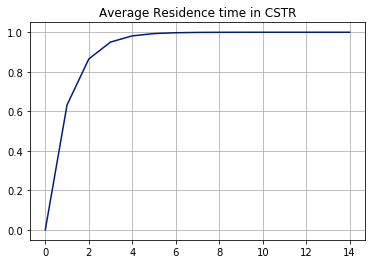

In [2]:
def eq2(tilde_t):
    return (1 - np.exp(-tilde_t))

lim = 15
x = range(lim)
y = [eq2(val) for val in x]

plt.plot(x,y)
plt.grid(True)
plt.title("Average Residence time in CSTR")
plt.show()

<hr>
<span style="color: #990033;">

Percentage of molecules having residence time less than equal to $\tau$ is given by:

$Eq (1)$ at $t = \tau$. 

Or equivalently by:

$Eq (2)$ at $\tilde{t} = t/\tau = \tau/\tau = 1 $

<hr>

In [3]:
print("Percentage of molecules having residence time less than equal to mean is: ", eq2(1))

Percentage of molecules having residence time less than equal to mean is:  0.6321205588285577


# Exercise 2.3

Show that
$$
\int_0^{\infty} \frac{1}{\tau} \theta e^{-\theta/\tau}
        d\theta = \tau
$$
and hence confirm the result in Eq (2.19).

<hr>
<span style="color: #990033;">

### `Solution:`
<br>
$
\int_0^{\infty} \frac{1}{\tau} \theta e^{-\theta/\tau} d\theta = 
\frac{1}{\tau} \int_0^{\infty} \theta e^{-\theta/\tau} d\theta
$

Using Integration By Parts:

$
\frac{1}{\tau} \left.\left[ \theta (-e^{-\theta/\tau} \tau) - \int(-e^{-\theta/\tau} \tau) \right]\,\right|_0^{\infty}
$

$
= \frac{1}{\tau} \left.\left[ \theta (-e^{-\theta/\tau} \tau) - e^{-\theta/\tau} \tau^2) \right]\,\right|_0^{\infty}
$

$
= -\frac{\tau e^{-\theta/\tau}}{\tau} \,\left.\left( \theta + \tau) \right)\,\right|_0^{\infty}
= -e^{-\theta/\tau}\,\left.\left( \theta + \tau) \right)\,\right|_0^{\infty}
$

$
= -e^{-\infty/\tau} \,\left( \infty + \tau) \right) - \left[-e^{-0/\tau} \,\left( 0 + \tau) \right) \right]
$

$
= 0 + \tau = \tau
$

$
\implies \int_0^{\infty} \frac{1}{\tau} \theta e^{-\theta/\tau} d\theta \,=\, \tau
$

<hr>

# Exercise 2.4

The following probability distribution functions:
    $$
    f(x) = \frac{1}{3\sqrt{2\pi}}e^{\frac{-x^2}{18}}; - \infty < x < \infty
    $$
    
and
    $$
    f(y) = \frac{1}{\sqrt{2\pi}}e^{\frac{-y^2}{2}}; - \infty < y < \infty
    $$
    
represent how the occurrences of all the possible outcomes of the two randomly varying, continuous variables, $X$ and $Y$, are distributed. Plot these two distribution functions on the same graph.  Which of these variables has a higher degree of uncertainty associated with the determination of any particular outcome. Why?

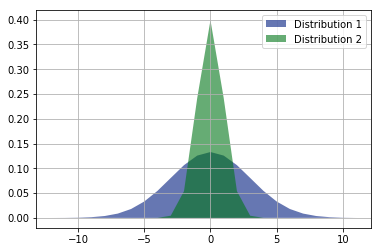

In [4]:
def distribution1(x):
    return (1/(3*np.sqrt(2*np.pi)))*(np.exp((-(x**2))/18))
    

def distribution2(y):
    return (1/(np.sqrt(2*np.pi)))*(np.exp((-(y**2))/2))



lim = 12
t = range(-lim, lim)

x = [distribution1(val) for val in t]
y = [distribution2(val) for val in t]

alpha=0.6
plt.fill(t, x, label='Distribution 1', alpha=alpha)
plt.fill(t, y, label='Distribution 2', alpha=alpha)
plt.grid(True)
plt.legend()
plt.show()

<hr>
<span style="color: #990033;">

> #### `Observations:`

> Distribution 1 has more uncertainity associated with it because it has a broader distribution whereas Distribution 2 has tighter clustering of possible outcomes.

<hr>

# Exercise 2.5

When a `fair` coin is tossed 4 times, it is postulated that the probability of obtaining $x$ heads is given by the probability distribution function:
    $$
    f(x) = \frac{4!}{x!(4-x)!}0.5^4
    $$
    
Determine the probability of obtaining $x=0, 1, 2, \ldots, 4$ heads.  Intuitively, which of these outcomes would you think will be the `most likely?`  Are the results of your computation consistent with your intuition?

In [5]:
n_times = 4
def p_of_heads(x):
    return ((math.factorial(n_times))*((0.5)**n_times)/((math.factorial(x)*math.factorial(n_times-x))))

for i in range(5):
    print("The probability of obtaining {} heads is {}".format(i, p_of_heads(i)))

The probability of obtaining 0 heads is 0.0625
The probability of obtaining 1 heads is 0.25
The probability of obtaining 2 heads is 0.375
The probability of obtaining 3 heads is 0.25
The probability of obtaining 4 heads is 0.0625


<hr>
<span style="color: #990033;">

> #### `Observations:`

> Intuitively I think it is most probable that the number of heads obtained is equal to the number of tails. In other words, obtaining 2 heads should be the most probable outcome because getting less than 2 heads means getting 3 or 4 tails (and vice-versa for more than 2 heads) which should not be as probable as getting 2 heads and 2 tails.  And, as we can see from the results, this is indeed the case.

<hr>

# Exercise 2.6

In tossing a fair coin once, describe the classical `à-priori`, relative frequency `à-posteriori`, and the subjective perspectives of the probability of obtaining a head.